In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import matplotlib as mpl
import seaborn as sns
import numpy
import pyupset as pyu
# mpl.rcParams['font.sans-serif']='Arial'
# mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [54]:
NCBI_ref= pd.read_csv("../evaluation/transrate_reference_trinity_v_Fhet.NCBI_Dec2018.csv")
Trinity_ref = pd.read_csv("../evaluation/transrate_reference_Fhet.NCBI_v_trinity_Dec2018.csv")

In [55]:
Trinity_ref.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,weighted,species
0,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,4085,0.01242,2496,0.00759,0.04971,NaN,NaN,NaN,NaN,F_chrysotus
1,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,4711,0.01587,2931,0.00988,0.06003,NaN,NaN,NaN,NaN,F_olivaceous
2,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,5138,0.02233,3536,0.01537,0.07208,NaN,NaN,NaN,NaN,F_zebrinus
3,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,6038,0.01093,3873,0.00701,0.04796,NaN,NaN,NaN,NaN,F_heteroclitusMDPP
4,/pylon5/bi5fpmp/ljcohen/Fhet_reference_genome/...,41170,86,90562,130236694,3162.74525,167,35862,714,37306,...,6418,0.01310,4323,0.00882,0.04797,NaN,NaN,NaN,NaN,F_heteroclitusMDPL


In [4]:
NCBI_v_Trinity = Trinity_ref[['species','n_contigs_with_CRBB','n_refs_with_CRBB']]
Trinity_v_NCBI = NCBI_ref[['species','n_contigs_with_CRBB','n_refs_with_CRBB']]

In [46]:
NCBI_v_Trinity.n_contigs_with_CRBB = pd.to_numeric(NCBI_v_Trinity.n_contigs_with_CRBB)
Trinity_v_NCBI.n_contigs_with_CRBB = pd.to_numeric(Trinity_v_NCBI.n_contigs_with_CRBB)

In [60]:
NCBI_v_Trinity

,species,n_contigs_with_CRBB,n_refs_with_CRBB
0,F_chrysotus,37272,23743
1,F_olivaceous,37483,23879
2,F_zebrinus,36080,22610
3,F_heteroclitusMDPP,38979,25460
4,F_heteroclitusMDPL,38844,25546
5,F_sciadicus,35894,22448
6,F_rathbuni,37799,24421
7,F_diaphanus,38043,24386
8,L_goodei,37732,23960
9,F_catanatus,37973,24441


In [59]:
Trinity_v_NCBI

,species,n_contigs_with_CRBB,n_refs_with_CRBB
0,F_chrysotus,112067,22050
1,F_olivaceous,116192,27711
2,F_zebrinus,99582,25760
3,F_heteroclitusMDPP,111184,18761
4,F_heteroclitusMDPL,178172,30354
5,F_sciadicus,85181,25543
6,F_rathbuni,117353,22555
7,F_diaphanus,109703,28108
8,L_goodei,121369,27588
9,F_catanatus,133504,28805


In [67]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='green', color2='blue', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, alpha = 0.5, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.2, lw=2)
    # prints numbers higher in DIB or NCGR assemblies
    #ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            #color= color1, fontsize='x-large', fontweight='heavy')
    #ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            #color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.3)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold', fontname='Arial')
    #ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    ax.tick_params(axis='y', which='both', right='off')
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='green', color1='blue', ymin=0, ymax=1, letter2='B'):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.5)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.5)
    
    [x1,x2]=ax.get_xlim()
    ax.plot([0,1], [df[col1].mean()]*2,'--', color='black')
    ax.plot([1,2], [df[col2].mean()]*2, '--', color='black')
    calc_value_ncgr = round(df[col1].mean(),2)
    calc_value_dib = round(df[col2].mean(),2)
    if calc_value_ncgr >= 1000:
        calc_value_ncgr = str(int(calc_value_ncgr/1000)) + "K"
    if calc_value_dib >= 1000:
        calc_value_dib = str(int(calc_value_dib/1000)) + "K"
    elif calc_value_ncgr >= 1000000:
        calc_value_ncgr = str(int(calc_value_ncgr/1000000)) + "M"
    elif calc_value_dib >= 1000000:
        calc_value_dib = str(int(calc_value_dib/1000000)) + "M"
    calc_value_ncgr = str(calc_value_ncgr)
    calc_value_dib = str(calc_value_dib)
    ax.text(0.5+x1/2, df[col1].mean(), calc_value_ncgr, fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')
    ax.text(0.5+x2/2, df[col2].mean(), calc_value_dib, fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')
    ax.set_xlim(x1,x2)
    ax.set_xticks([x1,x2])
    ax.set_xticklabels(['Trinity', 'NCBI'], fontsize='large', fontweight='bold', fontname='Arial')
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    #ax.set_axis_bgcolor('white')
    ax.set_yticklabels('')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    #ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')

def create_plots(df1, df2, column, col_title, df1name = 'Trinity', df2name = 'NCBI', ymax = 1, ymin = 0, ypos = 0.90):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column,
                                  fig = fig, ax = axs[0],
                                  df1name = df1name, 
                                  df2name = df2name, 
                                  ymax = ymax, 
                                  ymin = ymin, 
                                  ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold', fontname='Arial')
    
    return outdf, fig, ax

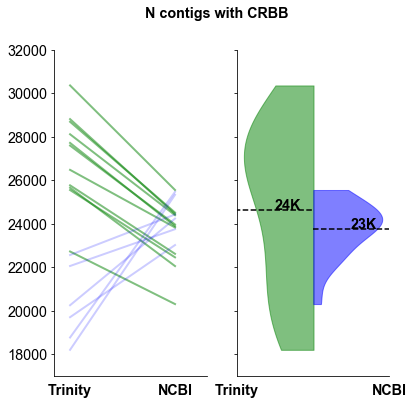

In [71]:
score,fig, ax = create_plots(NCBI_ref,Trinity_ref, 'n_refs_with_CRBB', 'N contigs with CRBB',ymax=32000,ymin=17000)
savefig('n_refs.png',bbox_inches="tight")

TypeError: Empty 'DataFrame': no numeric data to plot

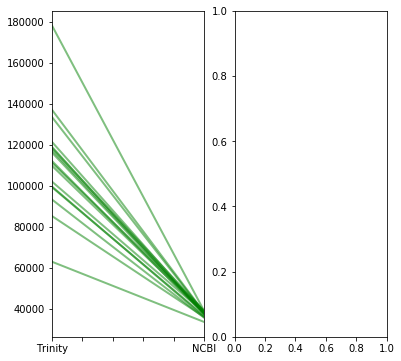

In [64]:
score,fig, ax = create_plots(NCBI_ref,Trinity_ref, 'n_contigs_with_CRBB', 'n_contigs_with_CRBB')
savefig('n_contigs.png',bbox_inches="tight")